<a href="https://colab.research.google.com/github/Vrutik-Patwa/Email-Spam-classifier/blob/main/Email_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.shape

(5572, 5)

In [ ]:
df=df.iloc[:,:2]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df['target']=df['target'].apply(lambda x:0 if x=='ham' else 1)

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df[df.duplicated()]

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
 df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x79eac93856c0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'spam'),
  Text(1.014499764949479, -0.4251943401757036, 'ham')])

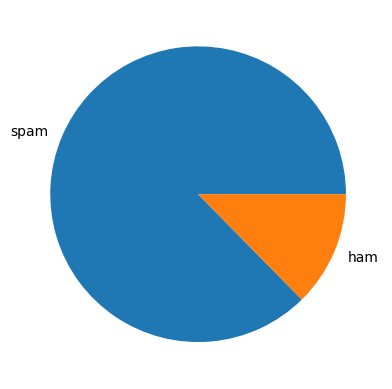

In [ ]:
plt.pie(df['target'].value_counts(),labels={'ham','spam'})

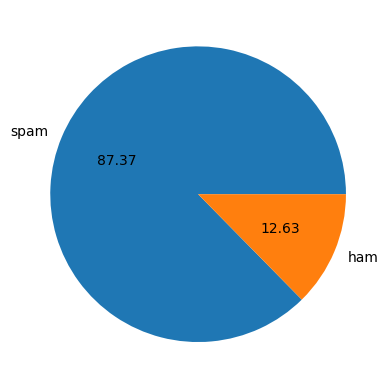

In [ ]:
plt.pie(df['target'].value_counts(),labels={'ham','spam'},autopct="%0.2f")
plt.show()

In [ ]:
#Data is imbalanced
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [ ]:
df['num_char']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
((nltk.word_tokenize(df['text'][0])))

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [ ]:
print(*df['text'][0].split(' '),sep='\n')

Go
until
jurong
point,
crazy..
Available
only
in
bugis
n
great
world
la
e
buffet...
Cine
there
got
amore
wat...


In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df["num_sentences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.iloc[:,2:].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

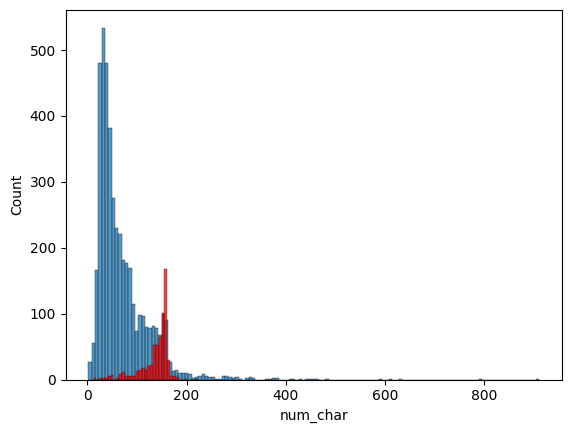

In [ ]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

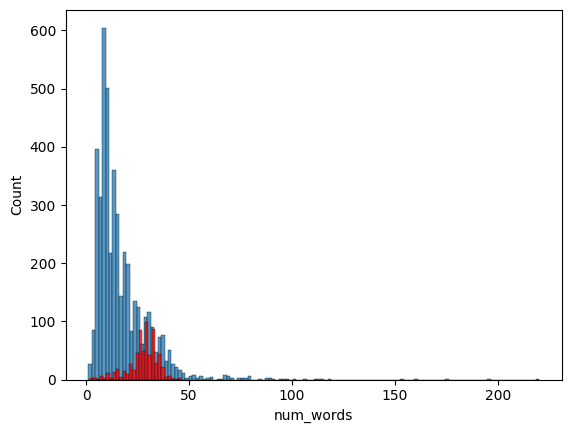

In [ ]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

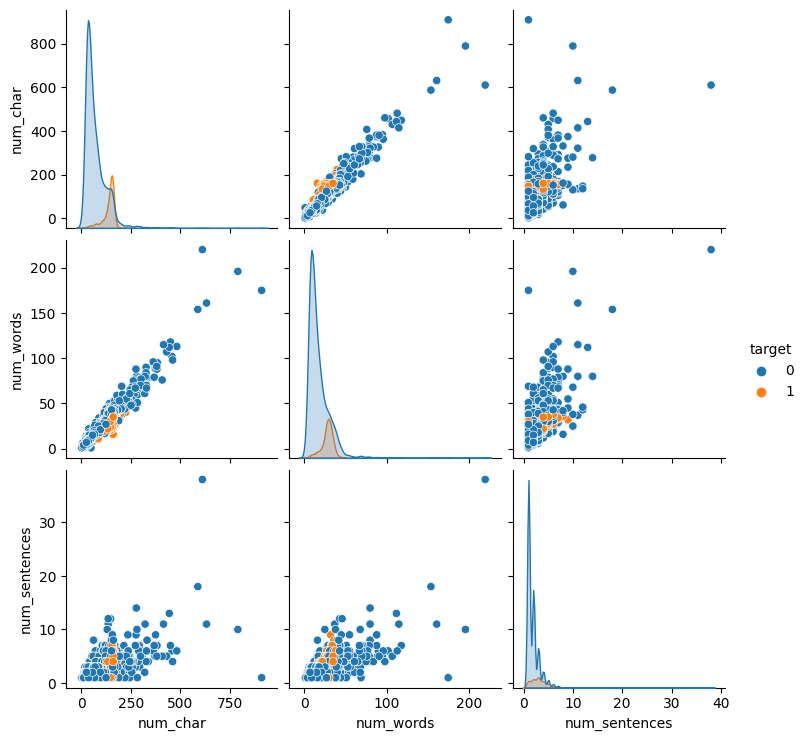

In [ ]:
sns.pairplot(df,hue='target')

<ipython-input-38-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

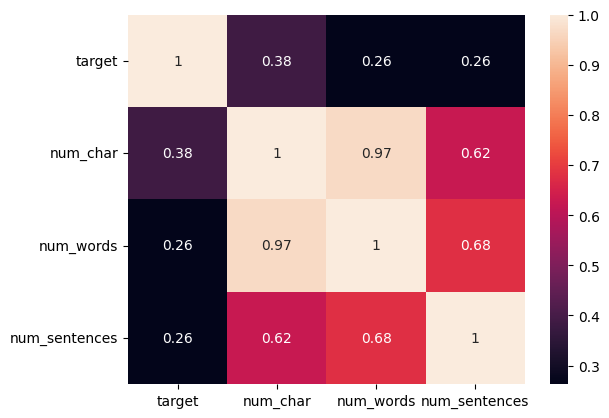

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
def transform_text(text):
  text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for word in text:
    if word.isalnum():
      y.append(word)

  text = y[:]
  y.clear()
  for word in text:
    if word not in stopwords.words('english') and word not in string.punctuation:
      y.append(word)

  text=y[:]
  y.clear()
  for word in text:
    y.append(ps.stem(word))
  return " ".join(y)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string

In [ ]:
from nltk import PorterStemmer
ps=PorterStemmer()

In [ ]:
transform_text("Hello my name is Vrutik")

'hello name vrutik'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
spam_word=[]
for lists in df[df['target']==1]['transformed_text'].tolist():
  for word in lists.split():
    spam_word.append(word)

In [ ]:
print(len(spam_word))

10847


In [ ]:
from collections import Counter

In [ ]:
pd.DataFrame(Counter(spam_word).most_common(30))

,0,1
0,call,320
1,free,191
2,2,157
3,txt,141
4,text,122
5,u,122
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer()

In [ ]:
X=tfid.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6826)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2
                                                )

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [ ]:
gnb =GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("accuracy score = ",accuracy_score(y_test,y_pred1))
print("confuxion matrix = \n",confusion_matrix(y_test,y_pred1))
print("precison score= ",precision_score(y_test,y_pred1))

accuracy score =  0.8800773694390716
confuxion matrix = 
 [[798  98]
 [ 26 112]]
precison score=  0.5333333333333333


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("accuracy score = ",accuracy_score(y_test,y_pred2))
print("confuxion matrix = \n",confusion_matrix(y_test,y_pred2))
print("precison score= ",precision_score(y_test,y_pred2))

accuracy score =  0.9564796905222437
confuxion matrix = 
 [[896   0]
 [ 45  93]]
precison score=  1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("accuracy score = ",accuracy_score(y_test,y_pred3))
print("confuxion matrix = \n",confusion_matrix(y_test,y_pred3))

print("precison score= ",precision_score(y_test,y_pred3))

accuracy score =  0.9709864603481625
confuxion matrix = 
 [[893   3]
 [ 27 111]]
precison score=  0.9736842105263158


In [ ]:
#tfid -> mnb